- One important feature of a time series is its **trend**. A positive trend is a line that generally slopes up - the values increase with time. Similarly, a negative trend is where the values decrease.
- A **seasonal** time series has patterns that repeat at regular intervals, for example high sales every weekend.
- In contrast, **cyclicality** is where there is a repeating pattern but no fixed period.
- **White noise** is a series of measurements, where each value is uncorrelated with previous values. You can think of this like flipping a coin, the outcome of a coin flip doesn't rely on the outcomes of coin flips that came before. Similarly, with white noise, the series value doesn't depend on the values that came before.
- To model a **time series**, it must be **stationary**. Stationary means that the distribution of the data doesn't change with time. For a time series to be stationary it must fulfill three criteria.
    - The series has *zero trend*, it isn't growing or shrinking
    - The *variance* is constant. The average distance of the data points from the zero line isn't changing
    - And the *autocorrelation* is constant. How each value in the time series is related to its neighbors stays the same.
- In time series, we train on the data earlier in the time series and test on the data that comes later. 

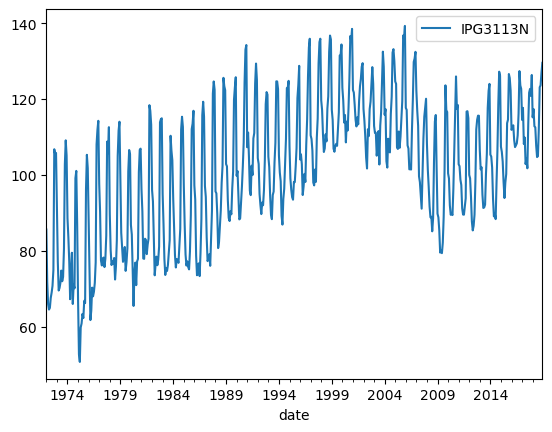

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

In [2]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1972-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IPG3113N  564 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


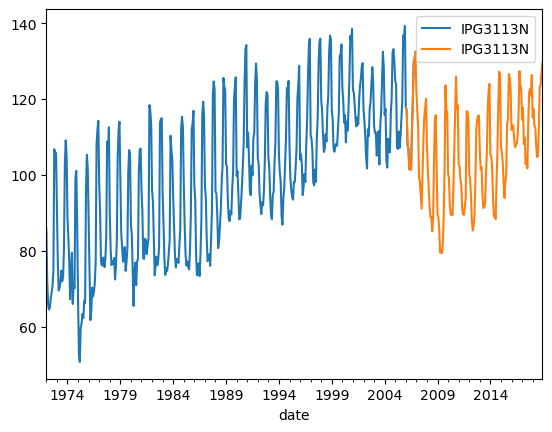

In [3]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2006':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets and show them
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

In [2]:
milk_production=pd.read_csv('milk_production.csv')

- Seasonal Decomposition: A time series can be broken down into trend, seasonal, and residual components using the seasonal_decompose function from the statsmodels library.
- Identifying Seasonality: The Autocorrelation Function (ACF) can help identify the period of seasonality by showing periodic correlation patterns. Peaks in the ACF plot indicate the repeating cycle.
- Detrending for Clarity: For non-stationary time series, detrending by subtracting the rolling mean can make the ACF plot clearer.

Fitting an ARIMA model to seasonal data without accounting for seasonality can lead to correlated residuals, meaning the model isn't fully utilizing the data for the best predictions.

**time series = trend + seasonal + residual**

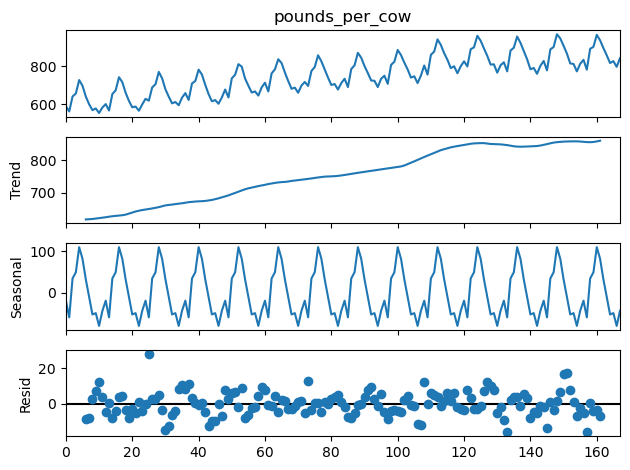

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(milk_production.pounds_per_cow, period=12)
decompose.plot()
plt.show()